In [1]:
import joypy
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm



### Визуализация тем на Joypy

In [2]:


data = pd.read_csv('vega/bivs_SSR_transform_bigartm_20topic.csv')
data.head()




,docID,year,month,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,...,topic_10,topic_11,topic_12,topic_13,topic_14,topic_15,topic_16,topic_17,topic_18,topic_19
0,0,1999,10,0.000000,0.000000,0.0,0.0,0.000000,0.488537,0.000000,...,0.000000,0.0,0.000000,0.0,0.066195,0.000000,0.000000,0.199918,0.000000,0.000000
1,1,1999,10,0.304284,0.271577,0.0,0.0,0.000000,0.000000,0.267460,...,0.000000,0.0,0.063658,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,2,1999,10,0.111435,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.244593,0.000000,0.000000,0.000000,0.000000
3,3,1999,10,0.053640,0.000000,0.0,0.0,0.204141,0.000000,0.213693,...,0.019033,0.0,0.032478,0.0,0.000000,0.000000,0.022262,0.000000,0.000000,0.062487
4,4,1999,10,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.0,0.071829,0.0,0.203797,0.000000,0.000000,0.000000,0.163072,0.000000


In [3]:

data['date'] = ['{}-{:02d}-01'.format(a, b) for a, b in data[['year', 'month']].values]
cols = [c for c in data.columns if c.startswith('topic')]


In [6]:
dd = data[cols + ['date']].melt('date', var_name='topic', value_name='mentions')
dd = dd[dd['mentions'] > 0]


In [7]:
dd2 = dd.groupby(['date','topic']).sum()
dd2.head()

mentions
date       topic             
1999-08-01 topic_1   0.518046
           topic_10  0.148091
           topic_11  0.094613
           topic_12  0.169081
           topic_13  0.506769

In [8]:
dd2=dd2.reset_index()
dd2.head()

,date,topic,mentions
0,1999-08-01,topic_1,0.518046
1,1999-08-01,topic_10,0.148091
2,1999-08-01,topic_11,0.094613
3,1999-08-01,topic_12,0.169081
4,1999-08-01,topic_13,0.506769


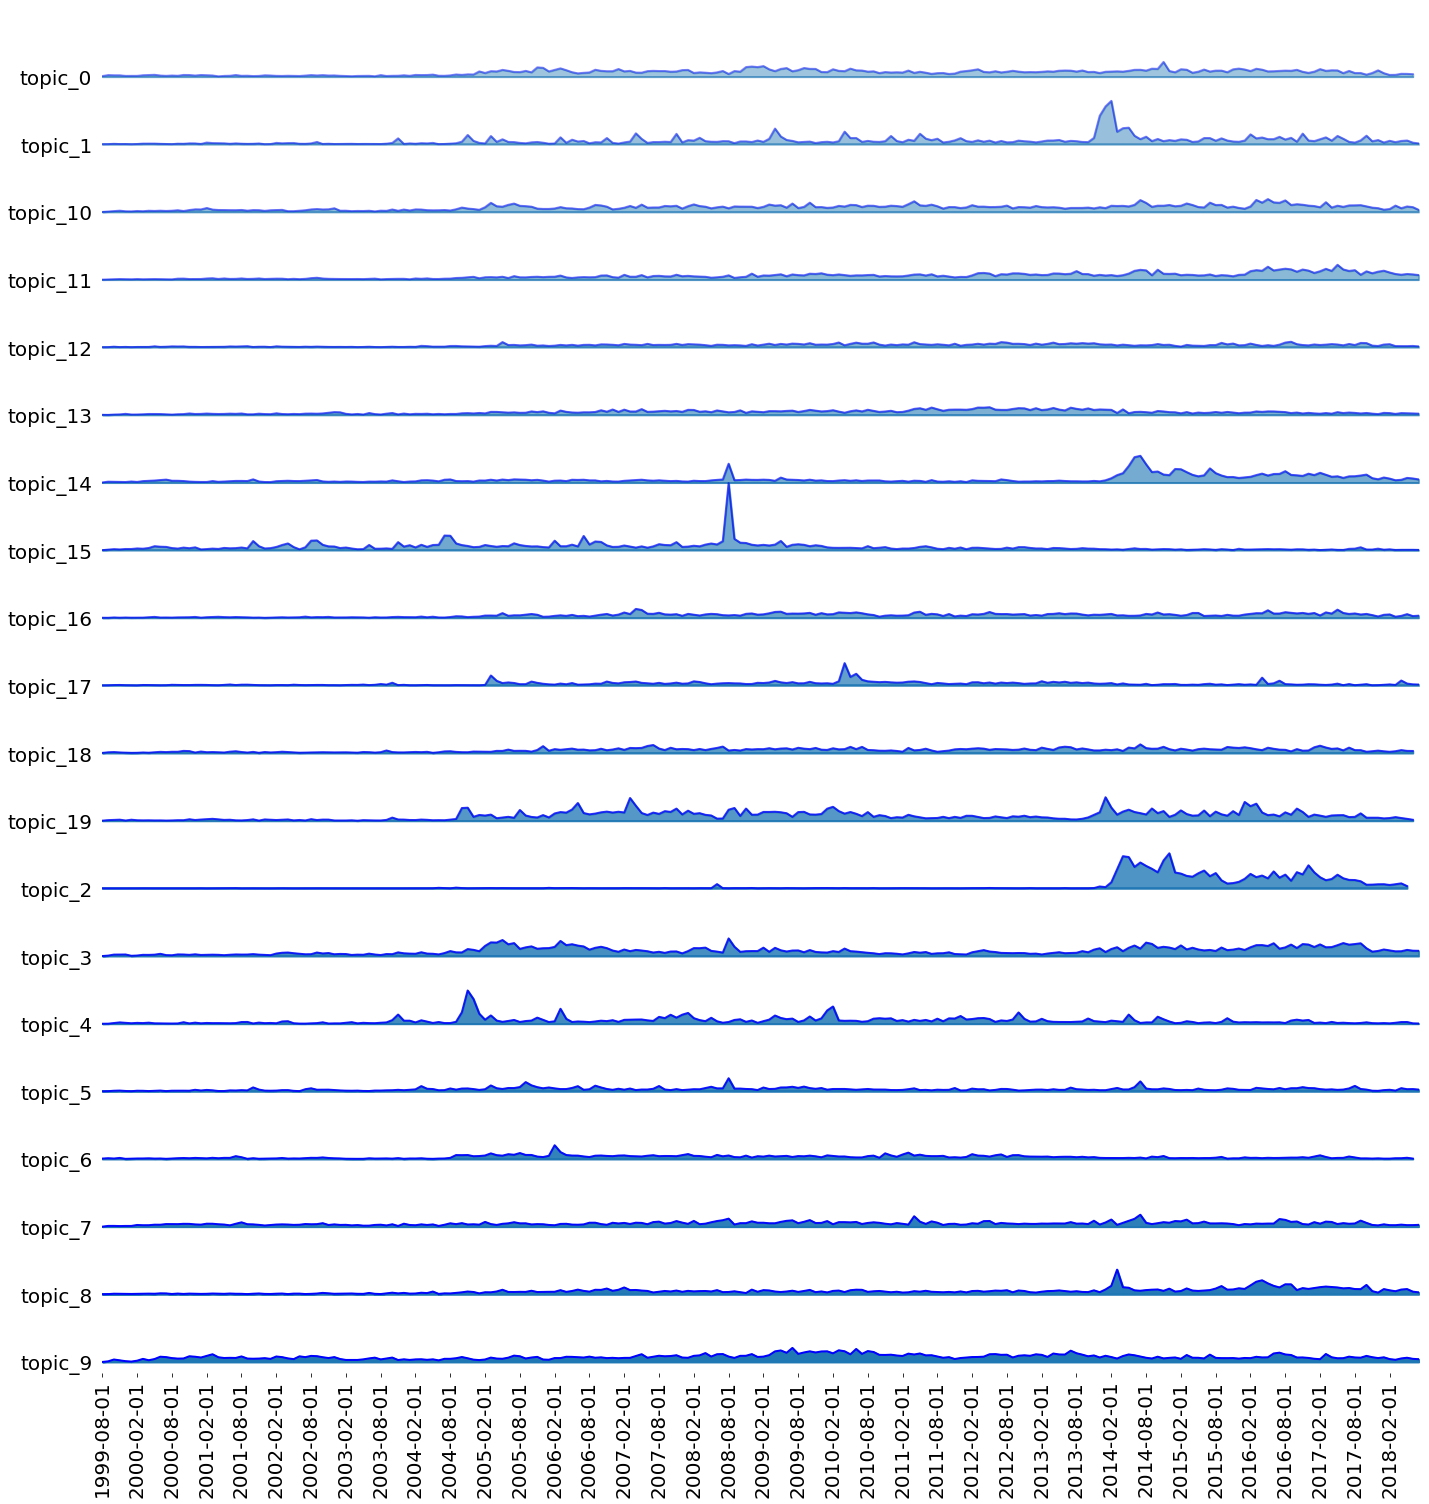

In [10]:

labels = sorted(data['date'].unique())
fig, axes = joypy.joyplot(dd2, by='topic', column='mentions', figsize=(20, 20),xlabelsize=20,ylabelsize=20
                          ,overlap=0.4,fill=True, linecolor="blue",linewidth=2,
              kind='values', fade=True, xrot=90, x_range=[i for i in range(len(labels))],
                         background='white');

ticks_labels = {i:t for i, t in enumerate(labels)}
axes[-1].set_xticks([k for k, v in ticks_labels.items() if k % 6 == 0])
ticks = axes[-1].get_xticks()
axes[-1].set_xticklabels([ticks_labels.get(i, 'stop') for i in ticks]);
